In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

Суть проекта 
--

отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Описание датасета
--

**school** — аббревиатура школы, в которой учится ученик  
**sex** — пол ученика ('F' - женский, 'M' - мужской)  
**age** — возраст ученика (от 15 до 22)  
**address** — тип адреса ученика ('U' - городской, 'R' - за городом)  
**famsize** — размер семьи('LE3' <= 3, 'GT3' >3)  
**Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)  
**Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
**Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
**Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)  
**reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)  
**guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)  
**traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  
**studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)  
**failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)  
**schoolsup** — дополнительная образовательная поддержка (yes или no)  
**famsup** — семейная образовательная поддержка (yes или no)  
**paid** — дополнительные платные занятия по математике (yes или no)  
**activities** — дополнительные внеучебные занятия (yes или no)  
**nursery** — посещал детский сад (yes или no)  
**higher** — хочет получить высшее образование (yes или no)  
**internet** — наличие интернета дома (yes или no)  
**romantic** — в романтических отношениях (yes или no)  
**famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
**freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)  
**goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
**health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  
**absences** — количество пропущенных занятий  
**score** — баллы по госэкзамену по математике  

In [97]:
df = pd.read_csv('stud_math.xls')

In [98]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Для удобства переименуем столбцы

In [100]:
new_columns = []
for col in df.columns:
    new_columns.append(col.lower())

In [101]:
df.columns = new_columns

In [102]:
df = df.rename({'studytime, granular': 'studytime_granular'}, axis=1)

Сразу бросается в глаза столбец **studytime, granular** - которого небыло в описании.  
Возникло предположение, что этот столбец будет как-то связан со столбцом **studytime**. Помимо похожего названия столбца, одинаковое кол-во заполненных значений. Но значения разные. Стоит проверить на корреляцию

In [106]:
df[['studytime', 'studytime_granular']].corr()

,studytime,studytime_granular
studytime,1.0,-1.0
studytime_granular,-1.0,1.0


100% обратная корреляция. Возможно эта оценка умноженная на какой-либо коэфициент.  
Смело удаляем столбец **studytime, granular**. Тем более, что его не было в описании :)

In [107]:
df = df.drop('studytime_granular', axis=1)

Дальше мы проверим, сколько уникальных значений в кажом из столбцов. На основании этого можно бегло сделать вывод, есть ли еще столбцы, которые стоит удалить (Например какие-то уникальные значения для каждой строки)

In [10]:
for col in df.columns:
    n = df[col].nunique()
    print('{} - уникальных значений в стобце "{}"'.format(n, col))

2 - уникальных значений в стобце "school"
2 - уникальных значений в стобце "sex"
8 - уникальных значений в стобце "age"
2 - уникальных значений в стобце "address"
2 - уникальных значений в стобце "famsize"
2 - уникальных значений в стобце "pstatus"
5 - уникальных значений в стобце "medu"
6 - уникальных значений в стобце "fedu"
5 - уникальных значений в стобце "mjob"
5 - уникальных значений в стобце "fjob"
4 - уникальных значений в стобце "reason"
3 - уникальных значений в стобце "guardian"
4 - уникальных значений в стобце "traveltime"
4 - уникальных значений в стобце "studytime"
4 - уникальных значений в стобце "failures"
2 - уникальных значений в стобце "schoolsup"
2 - уникальных значений в стобце "famsup"
2 - уникальных значений в стобце "paid"
2 - уникальных значений в стобце "activities"
2 - уникальных значений в стобце "nursery"
2 - уникальных значений в стобце "higher"
2 - уникальных значений в стобце "internet"
2 - уникальных значений в стобце "romantic"
6 - уникальных значений 

В каждом столбце от 2 до 36 уникальных значений. Следовательно на данном этапе оставляем столбцы со всеми значениями

Теперь исследуем каждый столбец
--

Для более быстрой работы напишу функцию

In [11]:
def primary_analysis(column):
    ''''Принимает на вход название анализируемого столбца
        Возвращает - кол-во встречаемых значений а так же 
        кол-во отсутствующих значений'''
    data = pd.DataFrame(df[column].value_counts())
    n = df[column].isnull().sum()
    
    return print(data, '\n\n' '{} - Пропущенных значений'.format(n))

'school'
--
аббревиатура школы, в которой учится ученик

In [12]:
primary_analysis('school')

    school
GP     349
MS      46 

0 - Пропущенных значений


Всего две школы и нет пропущенных значений. Все хорошо, двигаемся дальше

'sex'
--
пол ученика ('F' - женский, 'M' - мужской)

In [13]:
primary_analysis('sex')

   sex
F  208
M  187 

0 - Пропущенных значений


Тут тоже все хорошо, все значения на месте

'age'
--
возраст ученика (от 15 до 22)

In [14]:
primary_analysis('age')

    age
16  104
17   98
18   82
15   82
19   24
20    3
22    1
21    1 

0 - Пропущенных значений


Собственно и тут все отлично. Вот бы и дальше так))

'address'
--
тип адреса ученика ('U' - городской, 'R' - за городом)

In [15]:
primary_analysis('address')

   address
U      295
R       83 

17 - Пропущенных значений


Тут уже встречаются пропущенные значения, но пока трудно сказать, что с ними делать дальше.

'famsize'
--
размер семьи('LE3' <= 3, 'GT3' >3)

In [16]:
primary_analysis('famsize')

     famsize
GT3      261
LE3      107 

27 - Пропущенных значений


Тут уже больше пропусков, но так же не понятно, что с ними делать.

'pstatus'
--
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [17]:
primary_analysis('pstatus')

   pstatus
T      314
A       36 

45 - Пропущенных значений


Тут еще больше пропусков. Но здесь есть большой перевес значений 'T' против 'A'.  
Можно было бы пропуски заполнить значением 'T', но это наверное не самый лучший вариант.  
Пока отложим идею. Возможно в ходе дальнейшего анализа придут идеи получше

'medu'
--
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [18]:
primary_analysis('medu')

     medu
4.0   131
2.0   102
3.0    97
1.0    59
0.0     3 

3 - Пропущенных значений


'fedu'
--
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [19]:
primary_analysis('fedu')

      fedu
2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
40.0     1 

24 - Пропущенных значений


Тут заметно бросается в глаза то - что одно значение значительно выше, да и в описании его нету. Скорее всего - это просто ошибка. Хотели написать 4, а написали 40.  
Поэтому смело заменяем на 4 и перепроверяем

In [20]:
df['fedu'] = df['fedu'].apply(lambda x: 4 if x == 40 else x)

In [21]:
primary_analysis('fedu')

     fedu
2.0   106
3.0    96
4.0    89
1.0    78
0.0     2 

24 - Пропущенных значений


Так-то лучше :)

'mjob'
--
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [22]:
primary_analysis('mjob')

          mjob
other      133
services    98
at_home     58
teacher     55
health      32 

19 - Пропущенных значений


'fjob'
--
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [23]:
primary_analysis('fjob')

          fjob
other      197
services   102
teacher     29
at_home     16
health      15 

36 - Пропущенных значений


'reason'
--
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [24]:
primary_analysis('reason')

            reason
course         137
home           104
reputation     103
other           34 

17 - Пропущенных значений


'guardian'
--
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [25]:
primary_analysis('guardian')

        guardian
mother       250
father        86
other         28 

31 - Пропущенных значений


'traveltime'
--
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [26]:
primary_analysis('traveltime')

     traveltime
1.0         242
2.0          96
3.0          22
4.0           7 

28 - Пропущенных значений


'studytime'
--
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [27]:
primary_analysis('studytime')

     studytime
2.0        194
1.0        103
3.0         64
4.0         27 

7 - Пропущенных значений


'failures'
--
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [28]:
primary_analysis('failures')

     failures
0.0       293
1.0        49
2.0        16
3.0        15 

22 - Пропущенных значений


'schoolsup'
--
дополнительная образовательная поддержка (yes или no)

In [29]:
primary_analysis('schoolsup')

     schoolsup
no         335
yes         51 

9 - Пропущенных значений


'famsup'
--
семейная образовательная поддержка (yes или no)

In [30]:
primary_analysis('famsup')

     famsup
yes     219
no      137 

39 - Пропущенных значений


'paid'
--
дополнительные платные занятия по математике (yes или no)

In [31]:
primary_analysis('paid')

     paid
no    200
yes   155 

40 - Пропущенных значений


'activities'
--
дополнительные внеучебные занятия (yes или no)

In [32]:
primary_analysis('activities')

     activities
yes         195
no          186 

14 - Пропущенных значений


'nursery'
--
посещал детский сад (yes или no)

In [33]:
primary_analysis('nursery')

     nursery
yes      300
no        79 

16 - Пропущенных значений


'higher'
--
хочет получить высшее образование (yes или no)

In [34]:
primary_analysis('higher')

     higher
yes     356
no       19 

20 - Пропущенных значений


'internet'
--
наличие интернета дома (yes или no)

In [35]:
primary_analysis('internet')

     internet
yes       305
no         56 

34 - Пропущенных значений


'romantic'
--
в романтических отношениях (yes или no)

In [36]:
primary_analysis('romantic')

     romantic
no        240
yes       124 

31 - Пропущенных значений


'famrel'
--
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [37]:
primary_analysis('famrel')

      famrel
 4.0     182
 5.0      99
 3.0      62
 2.0      17
 1.0       7
-1.0       1 

27 - Пропущенных значений


Споймали одно отрицательное значение, которого не может быть. Скорее всего это тоже ошибка и должно быть 1, вместо -1

In [38]:
df['famrel'] = df['famrel'].apply(lambda x: 1 if x == -1 else x)

In [39]:
primary_analysis('famrel')

     famrel
4.0     182
5.0      99
3.0      62
2.0      17
1.0       8 

27 - Пропущенных значений


'freetime'
--
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [40]:
primary_analysis('freetime')

     freetime
3.0       153
4.0       112
2.0        63
5.0        38
1.0        18 

11 - Пропущенных значений


'goout'
--
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [41]:
primary_analysis('goout')

     goout
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23 

8 - Пропущенных значений


'health'
--
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [42]:
primary_analysis('health')

     health
5.0     138
3.0      89
4.0      63
1.0      47
2.0      43 

15 - Пропущенных значений


'absences'
--
количество пропущенных занятий

In [43]:
primary_analysis('absences')

       absences
0.0         111
2.0          60
4.0          53
6.0          31
8.0          21
10.0         17
12.0         12
14.0         12
3.0           8
16.0          7
7.0           6
5.0           5
18.0          5
20.0          4
22.0          3
9.0           3
1.0           3
15.0          2
13.0          2
11.0          2
25.0          1
54.0          1
385.0         1
26.0          1
56.0          1
24.0          1
212.0         1
21.0          1
75.0          1
30.0          1
19.0          1
38.0          1
40.0          1
23.0          1
17.0          1
28.0          1 

12 - Пропущенных значений


'score'
--
баллы по госэкзамену по математике

In [44]:
primary_analysis('score')

       score
50.0      54
55.0      46
0.0       37
75.0      33
65.0      31
40.0      31
60.0      31
70.0      27
45.0      27
80.0      16
30.0      15
90.0      12
35.0       9
25.0       7
85.0       6
95.0       5
100.0      1
20.0       1 

6 - Пропущенных значений


Итоги первичной обработки
--
- Таблица заполнена правильно. Каждый столбец соержит те же значения, что и в документации
- Было всего 2 ошибки в данных, все испавлено
- Кол-во пропущенных значений инода доходит до 40. Но нету четкого решения, что с ними делать. 
- Предположения по заполнению пропусков следующие: заполнять медианным значением, или наиболее часто встречаемым. К сожалению в курсе таких кейсов не разбирали

Распределение числового признака
--

Числовые признаки содержат следующие столбцы:  
- age
- absences
- score

Для начала проверим наличие выбросов как таковых

In [45]:
numeric_columns = ['age', 'absences', 'score']

In [46]:
outlier_col = []

for col in numeric_columns:
    perc25 = df.describe().loc['25%', col]
    perc75 = df.describe().loc['75%', col]
    iqr = perc75 - perc25
    low = perc25 - 1.5*iqr
    high = perc75 + 1.5*iqr
    
    outlier_count = df[(df[col] < low) | (df[col] > high)][col].count()
    
    if outlier_count >= 1:
        print('Столбец {} имеет {} выбросов'.format(col, outlier_count))
        outlier_col.append(col)

Столбец age имеет 1 выбросов
Столбец absences имеет 17 выбросов


Посмотрим на выбросы более детально

Age
--

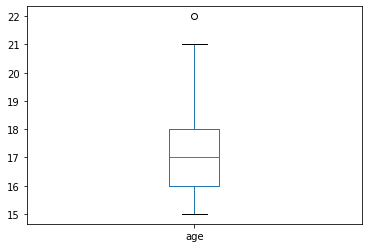

In [47]:
df['age'].plot(kind='box')

В случае со столбцом **age**, не засчитаем это за выброс, т.к. в описании указано, что значения до 22 лет. Возможно кто-то плохо учился и его оставляли на 2 год ;)

Absences
--

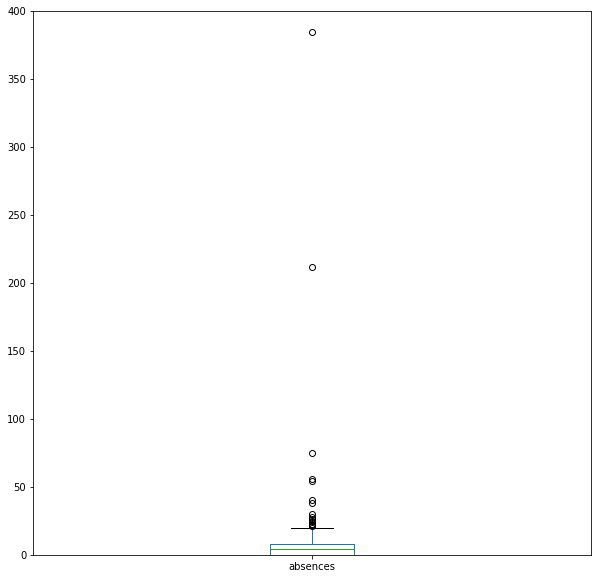

In [48]:
df[['absences']].plot(kind='box', ylim=(0, 400), figsize=(10, 10))

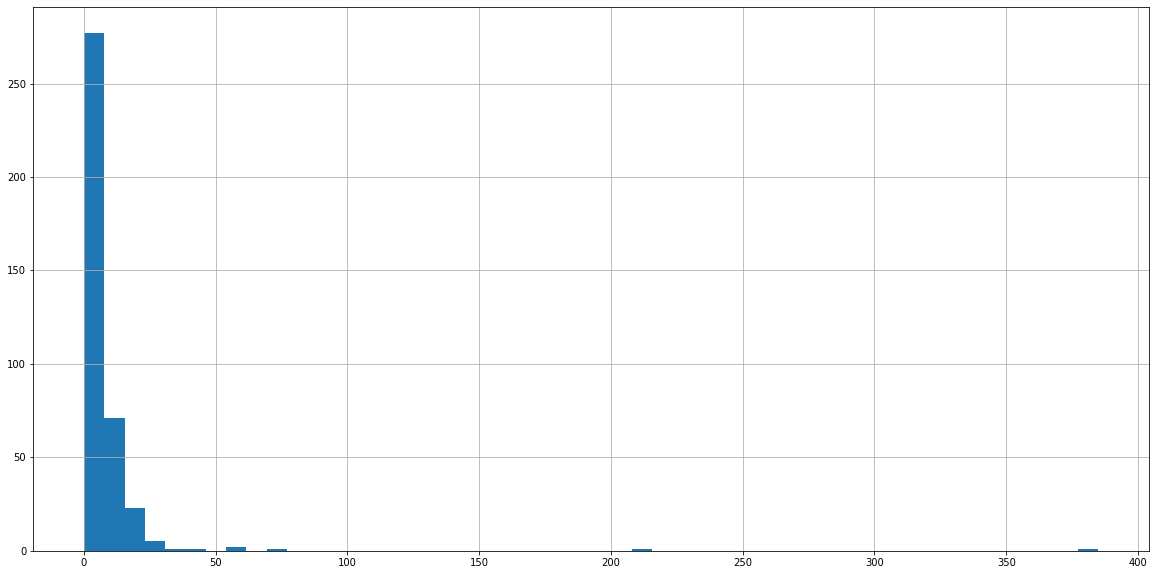

In [49]:
df['absences'].hist(bins=50, figsize=(20, 10))

In [108]:
perc25 = df['absences'].describe().loc['25%']
perc75 = df['absences'].describe().loc['75%']
iqr = perc75 - perc25
high = perc75 + 1.5*iqr
print('Верхняя граница выброса -', high)

Верхняя граница выброса - 20.0


In [51]:
df['absences'].value_counts().sort_index()

0.0      111
1.0        3
2.0       60
3.0        8
4.0       53
5.0        5
6.0       31
7.0        6
8.0       21
9.0        3
10.0      17
11.0       2
12.0      12
13.0       2
14.0      12
15.0       2
16.0       7
17.0       1
18.0       5
19.0       1
20.0       4
21.0       1
22.0       3
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
212.0      1
385.0      1
Name: absences, dtype: int64

Верхняя граница выбросов - 20. Но, например, значение 22 встречается 3 раза. Выброс это? Скорее нет.  
Так же если мы посмотрим выбросы (значения выше 20), то видим что между значениями не очень большой шаг. Поэтому делаю вывод, что есть только 2 выброса (212 и 385). Их и удалим и заменим на наиболее часто встречаемые значения.

In [52]:
df['absences'] = df['absences'].apply(lambda x: 0 if x >= 212 else x)

In [53]:
df['absences'].value_counts().sort_index()

0.0     113
1.0       3
2.0      60
3.0       8
4.0      53
5.0       5
6.0      31
7.0       6
8.0      21
9.0       3
10.0     17
11.0      2
12.0     12
13.0      2
14.0     12
15.0      2
16.0      7
17.0      1
18.0      5
19.0      1
20.0      4
21.0      1
22.0      3
23.0      1
24.0      1
25.0      1
26.0      1
28.0      1
30.0      1
38.0      1
40.0      1
54.0      1
56.0      1
75.0      1
Name: absences, dtype: int64

Score
--

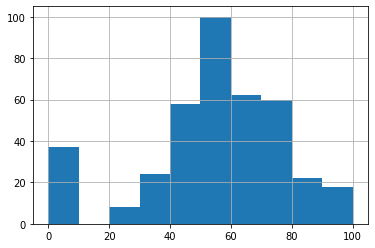

In [54]:
df['score'].hist()

In [55]:
df['score'].value_counts().sort_index().head()

0.0     37
20.0     1
25.0     7
30.0    15
35.0     9
Name: score, dtype: int64

В данном случае меня смущает значение 0, Неужели можно набрать 0 баллов на экзамене? Тем более, что следующее значение 20. Т.е. 37 человек набрали 0, и ни кто не набрал 5, 10, 15. Я бы убирал все, что с нулем

Корреляционный анализ
--

In [56]:
numeric_values = df[numeric_columns]

E:\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


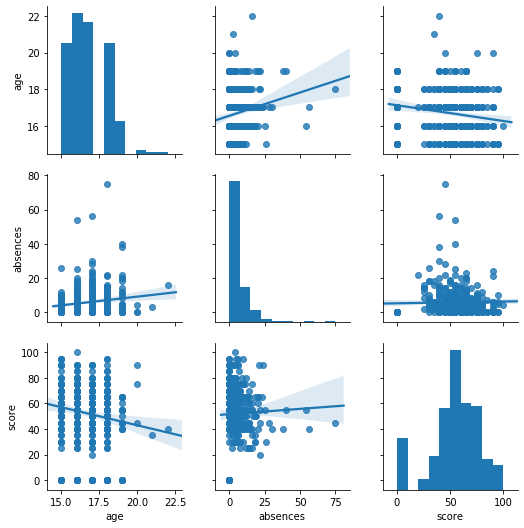

In [57]:
sns.pairplot(numeric_values, kind = 'reg')

In [58]:
numeric_values.corr()

,age,absences,score
age,1.000000,0.161195,-0.155726
absences,0.161195,1.000000,0.029421
score,-0.155726,0.029421,1.000000


Корреляция числовых столбцов не наблюдается


Изучим корреляцию количественных переменных

In [59]:
other_columns = ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']

In [109]:
def get_boxplot(column):
    ''''Получает на вход название столбца и возвращает boxplot для корреляции не числовых признаков'''
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index)],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

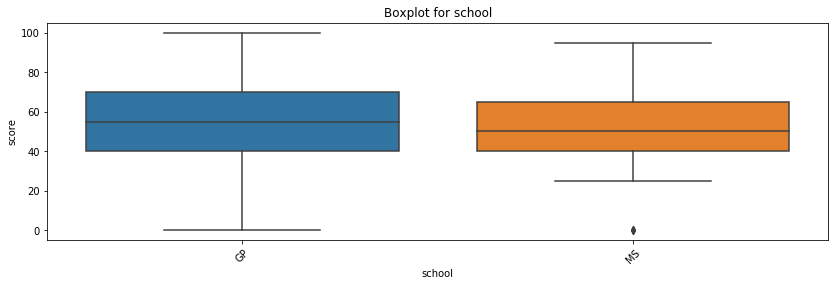

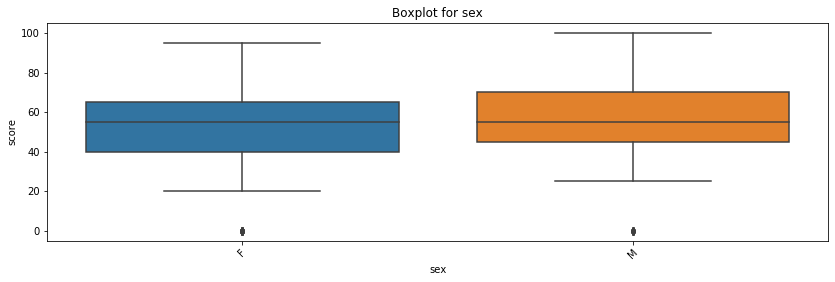

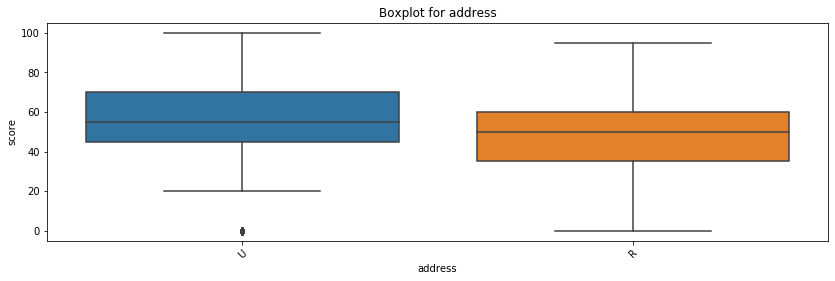

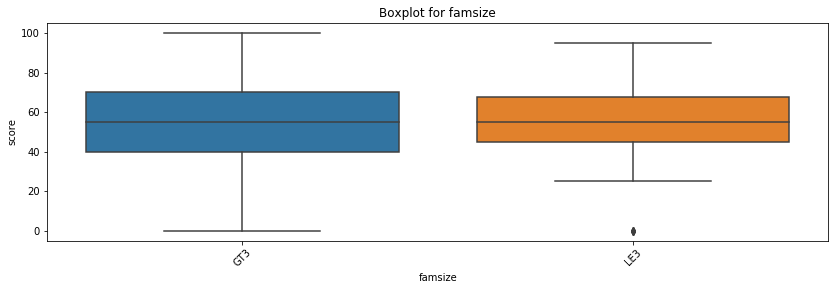

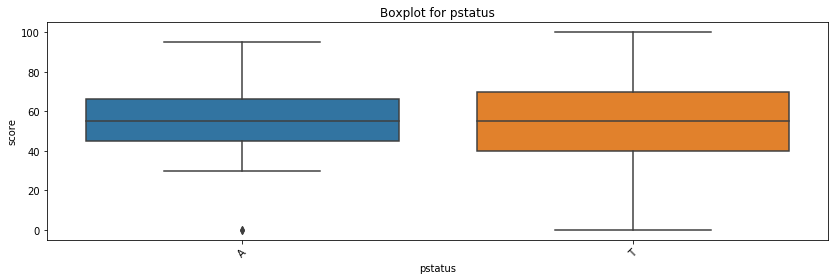

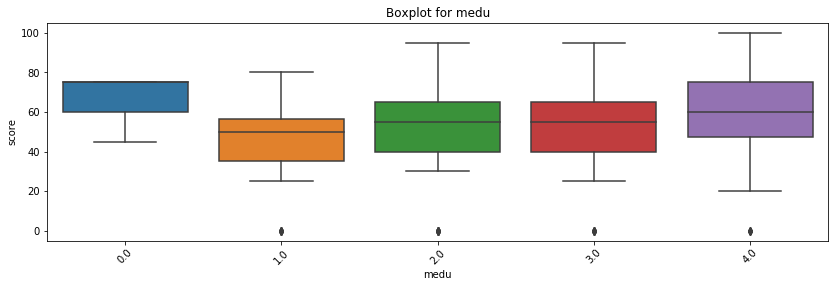

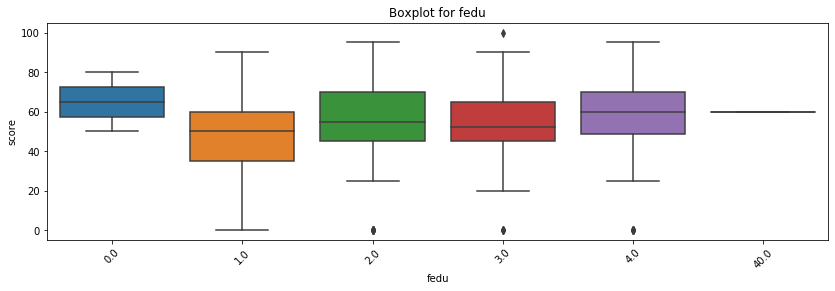

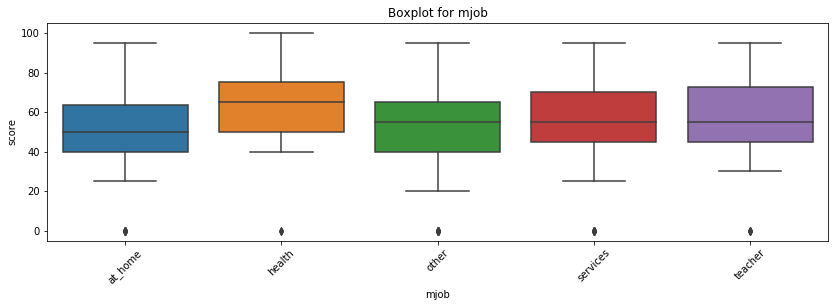

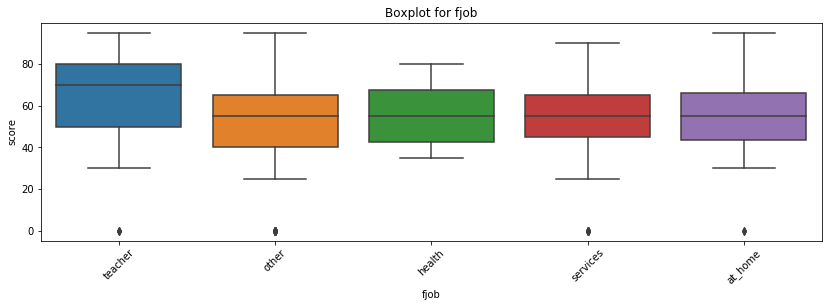

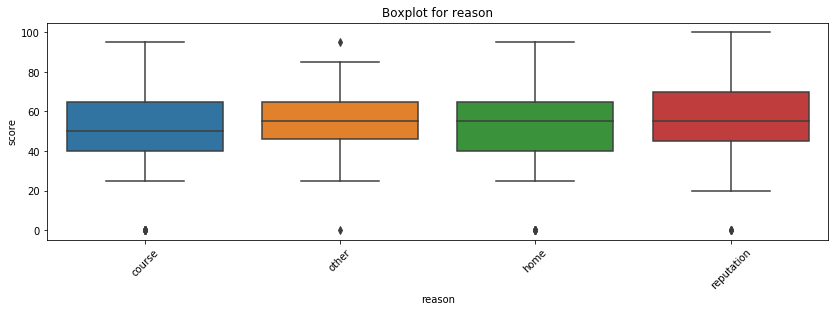

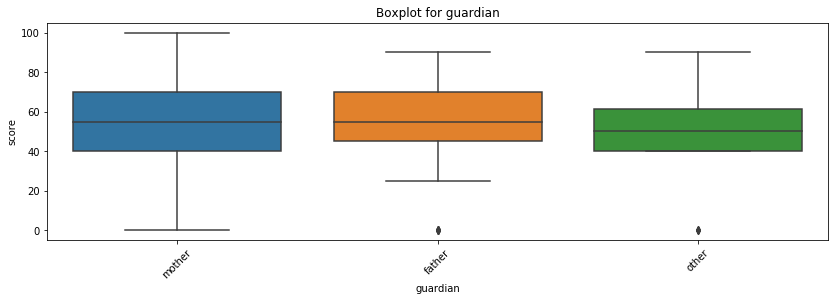

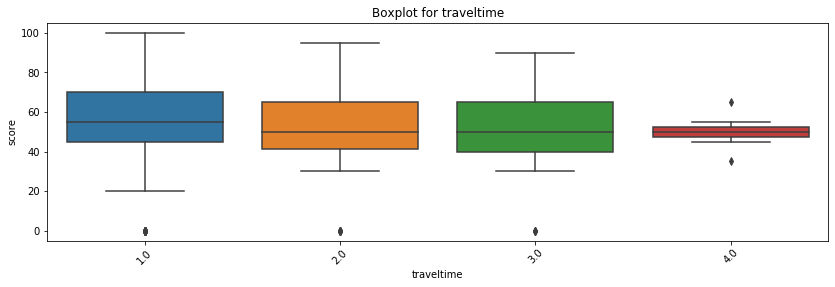

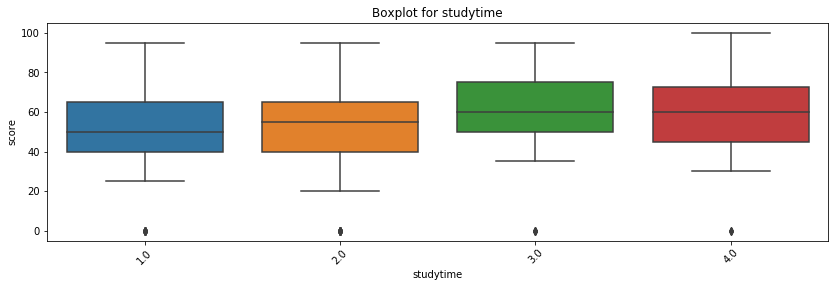

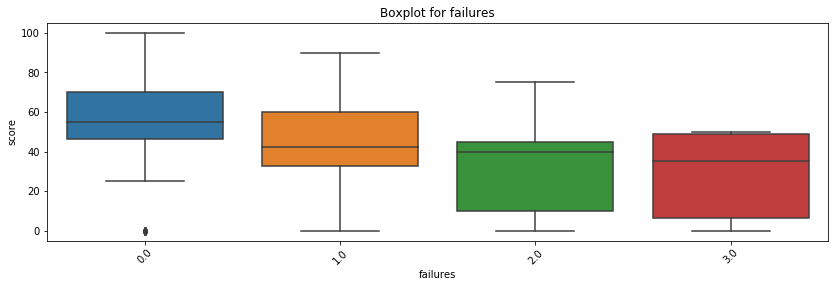

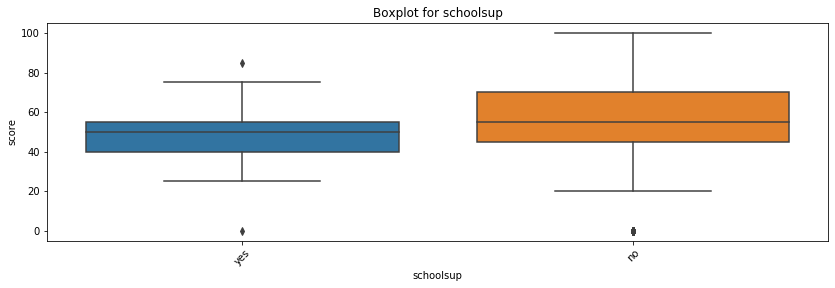

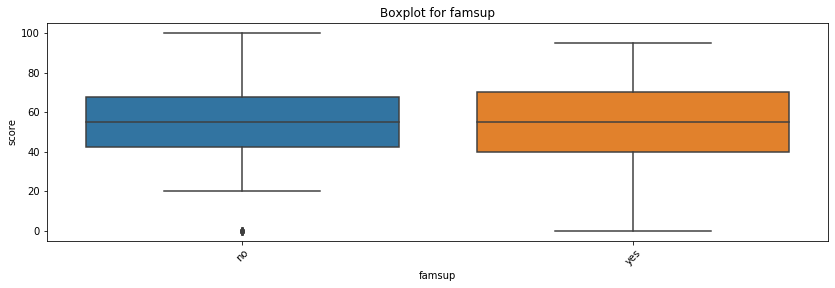

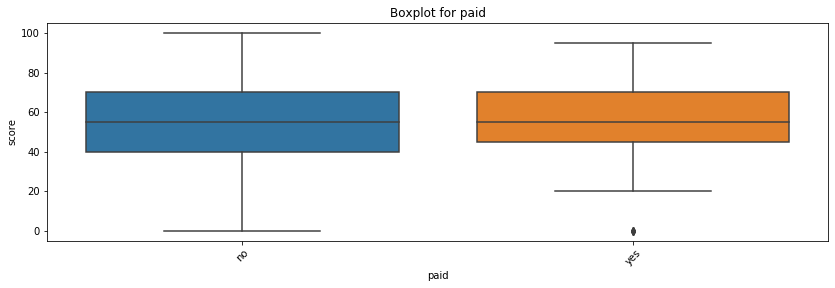

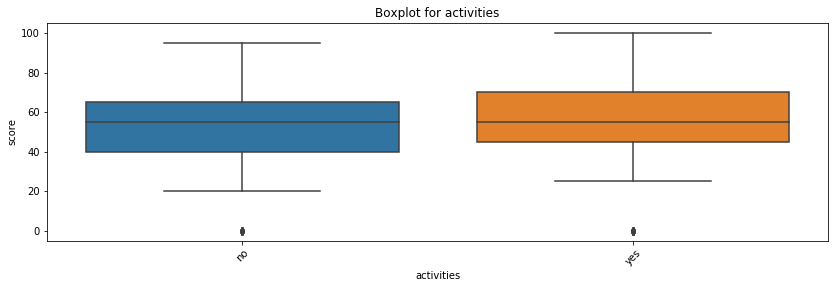

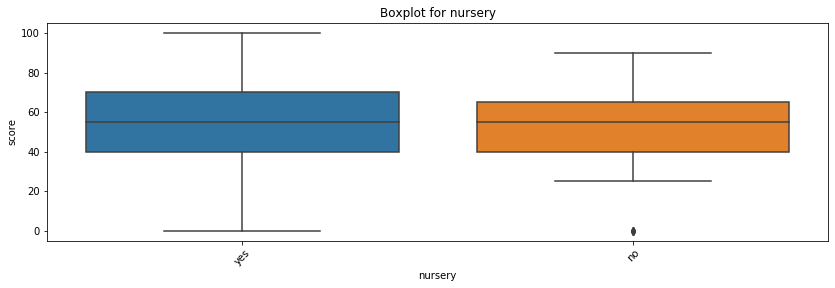

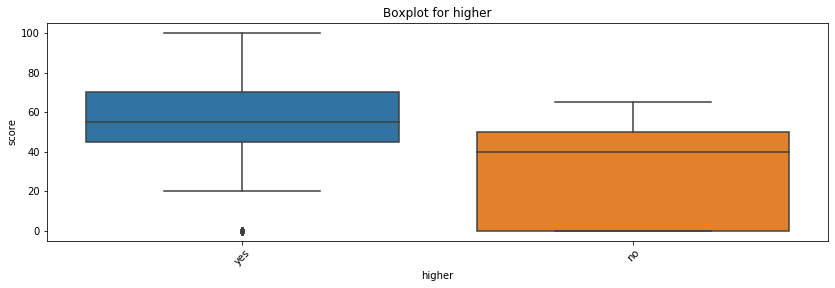

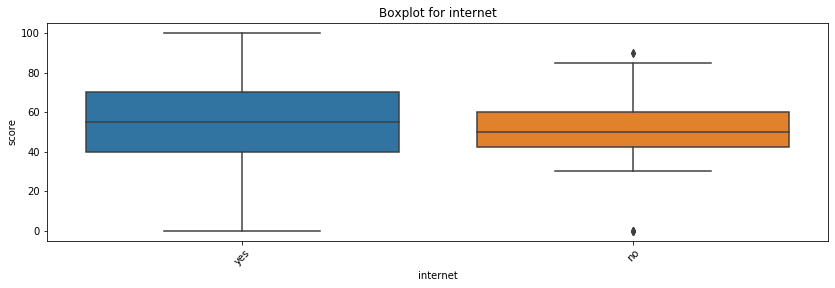

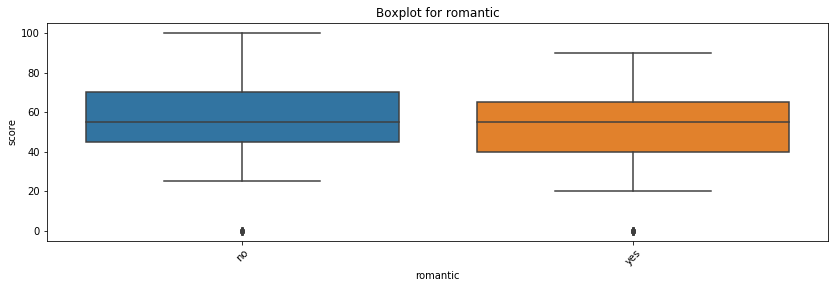

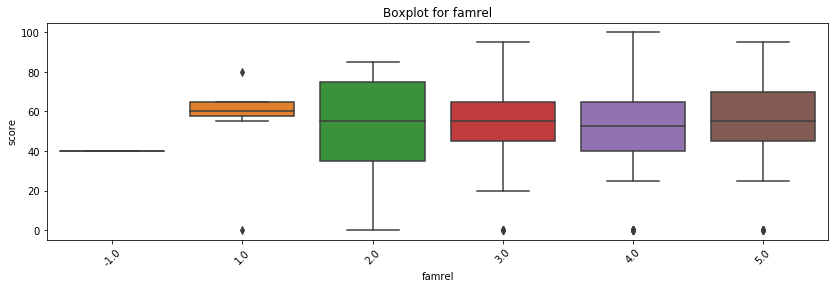

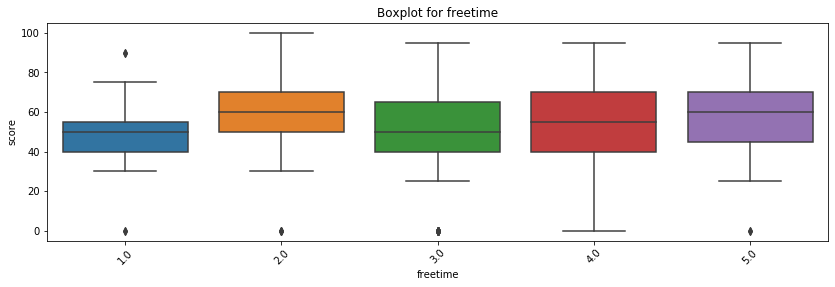

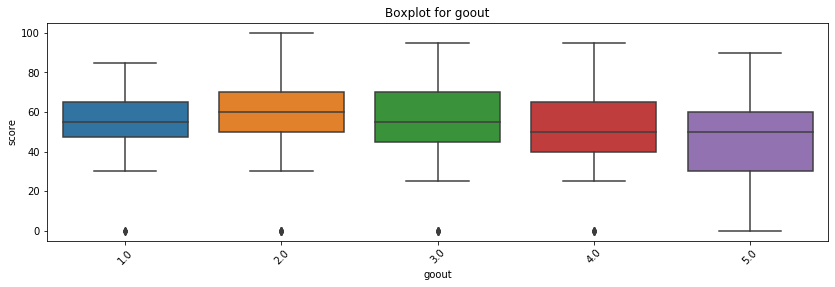

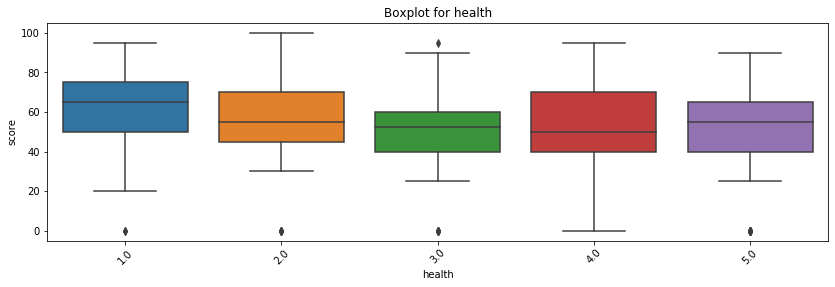

In [110]:
for column in other_columns:
    get_boxplot(column)

In [62]:
def get_stat_dif(column):
    ''''Получает на вход название столбца, возвращает информацию 
    о наличии статистически значимых различий для колонки'''
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'].dropna(), 
                     df.loc[df.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
            <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [63]:
for column in other_columns:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


Корреляция не числовых признаков
--

Не числовые значения характеризуют какой-либо признак. И если мы каждому признаку присвоим свой номер, то можно попробовать отследить закономерности (корреляцию). Это нужно для того, чтобы:  
- Убрать лишнее столбцы с корреляцией стремящейся к 100%
- Там где корреляция выше 50% или ниже -50%, можно заполнять пропущенные значения из коррелирующего столбца

In [67]:
text_columns = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 
                'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
                'famrel', 'freetime', 'goout', 'health']

In [68]:
# создадим копию датасета, чтобы не вносить изменения в основной

df_copy = df.copy()

In [69]:
# заменим пропущенные значения на None

for i in range(0, df_copy.shape[1]):
    df_copy.iloc[:, i] = df_copy.iloc[:, i].apply(lambda x: None if pd.isnull(x) else x)

In [70]:
df_copy

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,0.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,None,1.0,1.0,3.0,None,no,no,no,no,None,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,None,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [71]:
# каждому значению присвоим свой номер
# заменим значение на соответствующий номер

for col in text_columns:
    i = 1
    map_values = {}
        
    for val in df_copy[col].unique():
        if val != None:
            map_values[val] = i
            i += 1
    
    df_copy[col] = df_copy[col].map(map_values)

In [73]:
# а теперь проверим корреляцию

df_copy.corr()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.000000,-0.012286,0.377610,0.287661,0.059139,0.071655,-0.133708,-0.090249,-0.054864,0.141247,-0.117666,0.031233,0.254034,-0.092700,0.059999,0.139951,-0.185591,-0.030892,-0.114399,0.108543,0.031343,0.102274,0.060194,0.053411,0.039938,-0.077693,-0.079167,-0.102948,-0.044524
sex,-0.012286,1.000000,-0.028606,-0.001084,0.099341,0.039071,0.080375,0.029563,0.188952,-0.032130,-0.079432,-0.015028,0.049019,-0.307566,0.040279,0.138649,-0.162145,-0.107899,0.109267,-0.004051,0.153372,-0.059940,-0.134497,0.017941,0.127060,0.038376,-0.009120,-0.066808,0.099285
age,0.377610,-0.028606,1.000000,0.147902,0.022638,0.015458,-0.161704,-0.163670,-0.067034,0.110980,-0.015343,0.255268,0.081508,-0.015556,0.228047,0.256343,-0.159311,-0.030502,-0.110231,0.106453,0.207837,0.108964,0.144440,-0.043604,0.080450,-0.051357,0.018465,0.161195,-0.155726
address,0.287661,-0.001084,0.147902,1.000000,-0.058109,0.064629,-0.153189,-0.085408,-0.134224,-0.013138,-0.017364,-0.092095,0.285782,0.045182,0.101835,0.036284,-0.025894,-0.052925,0.052115,0.052285,0.052799,0.209745,0.010859,0.018853,0.018226,0.087114,-0.039875,0.029541,-0.120067
famsize,0.059139,0.099341,0.022638,-0.058109,1.000000,-0.078822,-0.055857,-0.087404,0.071174,0.049332,0.000858,-0.069513,0.041872,-0.086096,0.002320,0.033654,-0.122649,-0.083343,-0.025908,-0.103838,0.027185,0.004640,0.016508,0.037939,0.008712,0.012884,0.000524,0.015927,0.063324
pstatus,0.071655,0.039071,0.015458,0.064629,-0.078822,1.000000,-0.131697,-0.111747,-0.047119,0.053190,-0.031176,0.022706,0.081029,0.007697,0.011092,0.035225,-0.027150,0.040650,0.104314,0.065641,0.029150,-0.059023,-0.049715,-0.091416,0.004711,0.027365,-0.031913,-0.162279,-0.045985
medu,-0.133708,0.080375,-0.161704,-0.153189,-0.055857,-0.131697,1.000000,0.625516,0.459158,-0.150010,0.110124,-0.144894,-0.173515,0.078589,-0.245463,0.042360,0.207429,0.178744,0.106883,-0.188484,-0.176596,-0.208719,0.023870,0.049884,0.029586,-0.024815,0.018869,0.099638,0.213349
fedu,-0.090249,0.029563,-0.163670,-0.085408,-0.087404,-0.111747,0.625516,1.000000,0.238980,-0.111548,0.067729,-0.001328,-0.145349,0.012896,-0.272882,-0.050031,0.219144,0.101455,0.113534,-0.162113,-0.187323,-0.133716,0.010062,0.003799,-0.062522,-0.067538,0.017335,0.040450,0.130923
mjob,-0.054864,0.188952,-0.067034,-0.134224,0.071174,-0.047119,0.459158,0.238980,1.000000,0.015440,0.045571,-0.089984,-0.089272,-0.001446,-0.088017,0.045892,0.078418,0.138806,0.098601,-0.107133,-0.107935,-0.173966,-0.092247,-0.029763,0.062588,0.038387,0.040007,0.039591,0.101975
fjob,0.141247,-0.032130,0.110980,-0.013138,0.049332,0.053190,-0.150010,-0.111548,0.015440,1.000000,-0.014937,0.109318,-0.050033,0.021251,0.092914,0.026009,-0.045470,0.010315,0.068168,-0.029760,0.094762,-0.105672,0.029767,-0.002991,-0.033467,0.007172,0.000041,0.000923,-0.056620


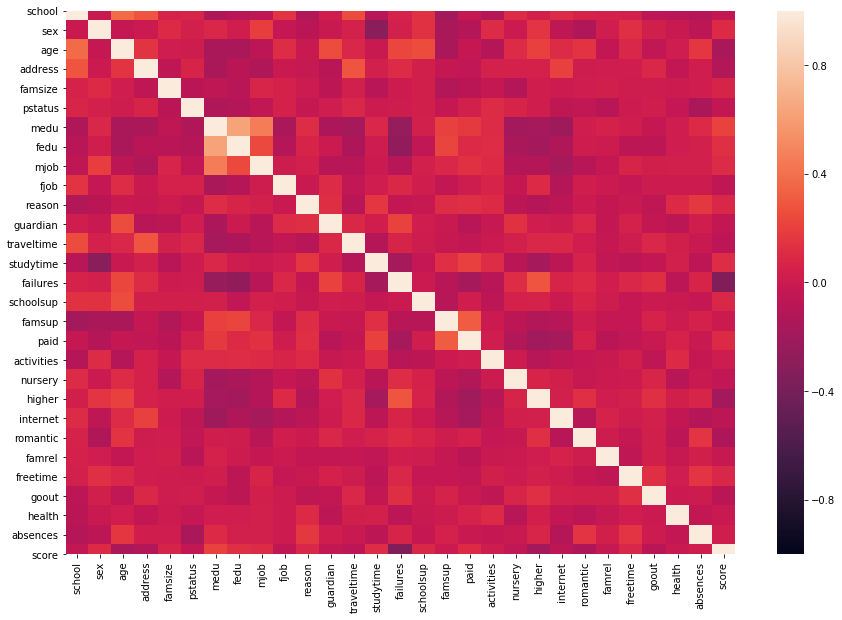

In [74]:
# для наглядности сделаем различные варианты тепловых карт

plt.figure(figsize=(15, 10))
sns.heatmap(df_copy.corr(), vmin=-1, vmax=1)

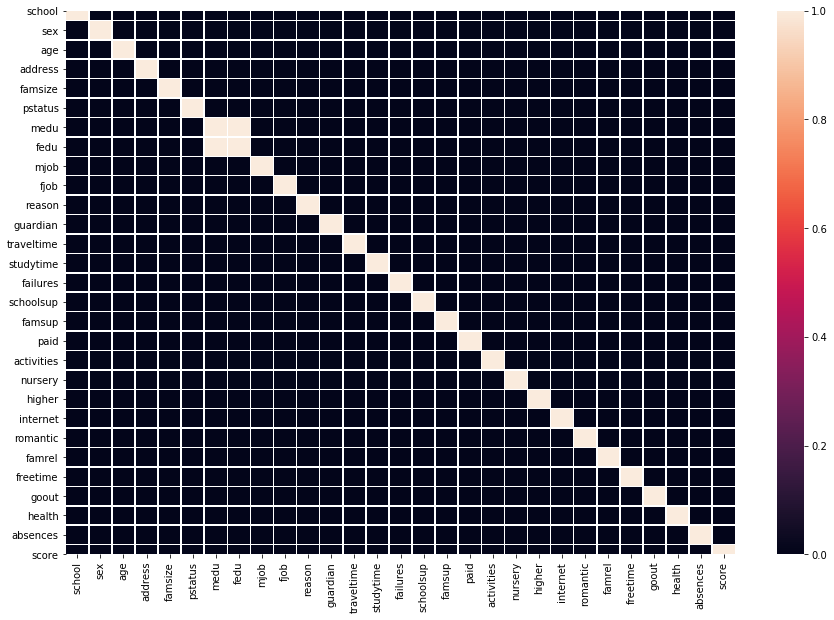

In [75]:
# отметим значения коррелирующие на 50%

plt.figure(figsize=(15, 10))
sns.heatmap((df_copy.corr() > 0.5), linewidths=0.5)

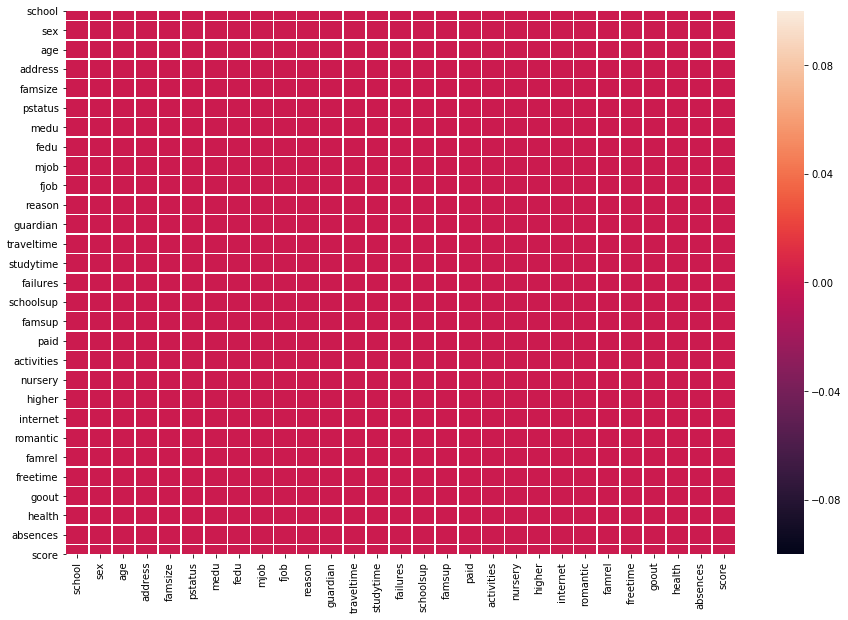

In [76]:
# отметим значения коррелирующие на -50%

plt.figure(figsize=(15, 10))
sns.heatmap((df_copy.corr() < -0.5), linewidths=0.5)

Мы видим, что коррелируют столбцы 'medu', 'fedu'. Соответственно можно пропущенные значения брать из соседнего столбца

In [77]:
df_edu = df[['medu', 'fedu']]

In [78]:
df_edu[(df_edu.medu.isnull()) | (df_edu.fedu.isnull())]

,medu,fedu
21,4.0,NaN
42,4.0,NaN
46,3.0,NaN
57,4.0,NaN
58,1.0,NaN
67,3.0,NaN
92,NaN,1.0
137,3.0,NaN
142,4.0,NaN
159,3.0,NaN


In [79]:
# заменяем пропущенные значения на значение из соседнего столбца

for i in range(0, df.shape[0]):
    if pd.isnull(df.loc[i, 'medu']):
        df.loc[i, 'medu'] = df.loc[i, 'fedu']
    if pd.isnull(df.loc[i, 'fedu']):
        df.loc[i, 'fedu'] = df.loc[i, 'medu']

Удаление столбцов и срок
--

Ну а теперь будем удалять то, что я считаю необхдимым.  
Во-первых - это столбцы 'famsup', 'paid'.  
И вот почему:  
- много пропусков (10%+)
- распределение значений примерно 40 к 60. Если поставить наиболее часто встречаемое, то соотношение значительно сместится

Во-вторых, нужно удалить строки скорв с пропущенными значениями и с нулями. И вот почему:  
- 0 - явно ошибочное значение
- Если не брать нули, то распределение оценок нормальное. Однако если мы вместо пропущенных и нулей установим медиану/моду, то изменится стандартное отклонение и т.п. 
Таким образом у нас станет значительно меньше строк в датафрейме, но это меньшее из зол

In [80]:
df = df.drop(['famsup', 'paid'], axis=1)

In [81]:
indexes_del = df[(df.score == 0) | (pd.isnull(df.score))].index

In [82]:
df = df.drop(indexes_del)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 27 columns):
school        352 non-null object
sex           352 non-null object
age           352 non-null int64
address       338 non-null object
famsize       328 non-null object
pstatus       311 non-null object
medu          352 non-null float64
fedu          352 non-null float64
mjob          335 non-null object
fjob          320 non-null object
reason        337 non-null object
guardian      323 non-null object
traveltime    329 non-null float64
studytime     345 non-null float64
failures      332 non-null float64
schoolsup     343 non-null object
activities    340 non-null object
nursery       340 non-null object
higher        333 non-null object
internet      323 non-null object
romantic      323 non-null object
famrel        328 non-null float64
freetime      344 non-null float64
goout         346 non-null float64
health        339 non-null float64
absences      342 non-null float64
sc

Заполняем пропуски
--
Во всех остальных случаях мы заполним пропуски наиболее часто встречаемым значением.  
Для этой задачи напишим цикл

In [111]:
for col in df.columns:
    if df.shape[0] == df[col].count():
        continue
    else:
        val = df[col].value_counts().index[0]
        df[col] = df[col].apply(lambda x: val if pd.isnull(x) else x)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 27 columns):
school        352 non-null object
sex           352 non-null object
age           352 non-null int64
address       352 non-null object
famsize       352 non-null object
pstatus       352 non-null object
medu          352 non-null float64
fedu          352 non-null float64
mjob          352 non-null object
fjob          352 non-null object
reason        352 non-null object
guardian      352 non-null object
traveltime    352 non-null float64
studytime     352 non-null float64
failures      352 non-null float64
schoolsup     352 non-null object
activities    352 non-null object
nursery       352 non-null object
higher        352 non-null object
internet      352 non-null object
romantic      352 non-null object
famrel        352 non-null float64
freetime      352 non-null float64
goout         352 non-null float64
health        352 non-null float64
absences      352 non-null float64
sc

Вывод
--

- Для анализа был получен датасет на 30 столбцов, из которых без пропусков было только 3 столбца
- Был обнаружен столбец **studytime, granular** которого не было в описании. Но так как была корреляция -100%, то мы смело его удалили
- Явной корреляции не заметили  как по числовым признакам, так и по номинативным
- Были обнаружены очевидные ошибки когда вместо 4 ставили 40 (хотя здравый смысл говорит о том, что такого быть не может) и т.п. Их мало. Похоже на человеческий фактор.
- Выбросы были в столбцах **age** и **absences**
    - В **age** оставили, т.к. был только один выброс и он входил в допустимый диапазон из описания
    - В **absences** выбросов было больше, но удалили только 2 верхних значения, т.к. шаг выбросов остальных значений был небольшой и не похож на ошибочные значения
- Для параметра **score** было принято решение удалить строки с пропусками и где есть значение 0
    - 0 - явно ошибочное значение. Много оценок 0, а потом 20+. Больше похоже на пропуски. Да и "пальцем в небо" если сдавать тест, то это нужно быть супер-неудачником, чтобы сдать на 0! и ладно если бы 1 уникум, а то пару десятков.
    - Не считая значения 0, в целом распределение нормальное. Однако если заполнять 0 и пропуски медианой/модой/средним - то оно сильно вырастет по центру, и не изменица по краям. Изменится дисперсия. Скорее всего это так себе вариант.
    - Пропущенные значения заполнять, это опеределенная доля угадывания. А т.к. этот признак мы собираемся предсказывать, то лучше сделать его меньше, но зато будет точным
- Удалил столбцы **'famsup', 'paid'** 
    - много пропусков (10%+)
    - Вероятность исказить картину. Распределение значений примерно 40 к 60. Если поставить наиболее часто встречаемое, то соотношение значительно сместится
- Пропущенные значения столбцов **medu** заменяли значениями из столбца **fedu** и наоборот. Было принято такое решение, т.к. наблюдалось совпадение в 60%+ случаев
- Для всех остальных признаков было принято решение заполнять пропуски наиболее часто встречаемым значением, т.к.
    - При таком подходе не создавался сильный перекос в пользу того или инного значения
    - Подобных кейсов на курсе не было и такое решение кажется наиболее логичным